In [7]:
import tensorflow as tf
import spacy
from tensorflow.keras.models import load_model

import opendatasets as od




import numpy as np

In [4]:
clf_model = load_model('/content/drive/MyDrive/WinStars/Task_2/models/img_clf/tune_model/Model.keras')
ner_model = spacy.load('/content/drive/MyDrive/WinStars/Task_2/models/ner_models')

In [ ]:
data_name = 'https://www.kaggle.com/datasets/utkarshsaxenadn/animal-image-classification-dataset?resource=download&select=Testing+Data'
od.download(data_name)

In [62]:
def make_pred(path = None):

  class_list = ['BEETLE', 'BUTERFLY', 'CAT', 'COW', 'DOG', 'ELEPHANT', 'GORILLA', 'HIPPO',
              'LIARD', 'MONKEY', 'MOUSE', 'PANDA', 'SPIDER', 'TIGER', 'ZEBRA']

  data = tf.keras.utils.load_img(path)

  input_arr = tf.keras.utils.img_to_array(data)
  input_arr = tf.image.resize(input_arr,(224, 224))
  input_arr = np.array([input_arr])

  predictions = clf_model.predict(input_arr)
  prediction = np.array([x.argmax(axis = 0) for x in (np.exp(x)/sum(np.exp(x)) for x in predictions)])[0]

  print('img_Pred: ' + class_list[prediction])

  return class_list[prediction]

In [63]:
def text_pred(text):
  doc = ner_model(text)
  if doc.ents == (): return 'None'
  else:
    for ent in doc.ents:
      _, y = ent.text, ent.label_
    print('NER_pred: \t' + str(y))

    return y

In [64]:
def compile(text, img_path):

  img_pred = make_pred(path = img_path)
  ner_pred = text_pred(text = text)

  if img_pred==ner_pred: return 1
  else: return 0


# Test

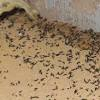

In [65]:
tf.keras.utils.load_img('/content/animal-image-classification-dataset/Testing Data/Testing Data/Mouse/Mouse-Test (15).jpeg')

In [66]:
compile(text = 'there are a lot of mice here',
        img_path='/content/animal-image-classification-dataset/Testing Data/Testing Data/Mouse/Mouse-Test (15).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
img_Pred: MONKEY
NER_pred: 	MOUSE


0

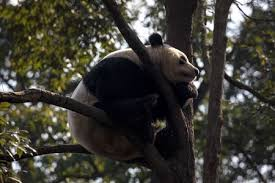

In [67]:
tf.keras.utils.load_img('/content/animal-image-classification-dataset/Testing Data/Testing Data/Panda/Panda-Test (119).jpeg')

In [68]:
compile(text = 'We can see panda here',
        img_path='/content/animal-image-classification-dataset/Testing Data/Testing Data/Panda/Panda-Test (119).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
img_Pred: PANDA


0

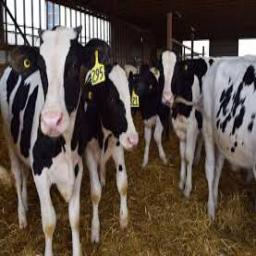

In [69]:
tf.keras.utils.load_img('/content/animal-image-classification-dataset/Testing Data/Testing Data/Cow/Cow-Test (122).jpeg')

In [70]:
compile(text = 'There are many breeds of cows worldwide.',
        img_path='/content/animal-image-classification-dataset/Testing Data/Testing Data/Cow/Cow-Test (122).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
img_Pred: COW
NER_pred: 	COW


1

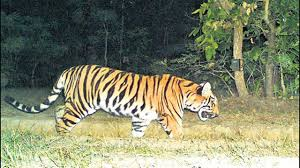

In [72]:
tf.keras.utils.load_img('/content/animal-image-classification-dataset/Testing Data/Testing Data/Tiger/Tiger-Test (117).jpeg')

In [71]:
compile(text = 'that looks like a cat',
        img_path='/content/animal-image-classification-dataset/Testing Data/Testing Data/Tiger/Tiger-Test (117).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
img_Pred: TIGER


0